# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: US State Data

## Import Data

In [87]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px

In [33]:
# import csse_covid_19_daily_reports

# create data frame:
# list of states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


statesA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [34]:
# add later date data

rowsum = pd.DataFrame()
stateData = pd.DataFrame()

In [35]:
start_date = date(2020, 1, 22)
end_date = date(2020, 1, 31)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [36]:
start_date = date(2020, 2, 1)
end_date = date(2020, 3, 9)

for single_date in pd.date_range(start_date, end_date):
    stateIter = iter(states)
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)

    for state in statesA:
        stateName = next(stateIter)
        totalInState = daily.loc[daily['Country/Region'] == 'US']
        totalInState = totalInState.loc[totalInState['Province/State'].str.contains(state)]
        if totalInState.empty == False:
            title = totalInState.loc[:,'Province/State':'Province/State']
            title = title.iloc[[0],:]
            title.at[:,'Province/State']= stateName
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [37]:
start_date = date(2020, 3, 10)
end_date = date(2020, 3, 21)

newStateData = pd.DataFrame()

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [38]:
start_date = date(2020, 3, 22)
end_date = end_date = datetime.date(datetime.now())

newStateData = pd.DataFrame()

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    try:
        daily = pd.read_csv(url, error_bad_lines=False)
        for state in states:
            totalInState = daily.loc[daily['Province_State'] == state]
            title = totalInState.loc[:,'Province_State':'Province_State']
            if totalInState.empty == False:
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
        newStateData = newStateData.set_index('Province_State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)
    except:
        print('Todays file has not yet been uploaded')

Todays file has not yet been uploaded


In [39]:
stateData = stateData.fillna(0)
stateData

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,...,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020
Washington,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1793.0,1997,2221,2328,2591,3207,3477,4030,4465,4923
Illinois,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,753.0,1049,1285,1537,1865,2538,3024,3491,4596,5056
Arizona,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,118.0,152,235,326,401,508,665,773,919,1157
California,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1364.0,1646,2108,2538,2998,3899,4657,5095,5852,7138
Massachusetts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,525.0,646,777,1159,1838,2417,3240,4257,4955,5752
Wisconsin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,282.0,381,425,481,621,728,926,1055,1164,1230
Texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,581.0,643,758,955,1229,1563,1937,2455,2792,3147
Nebraska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,51,51,66,71,74,82,96,108,145
Oregon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,114.0,161,191,210,266,316,416,479,548,606
Rhode Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.0,83,106,124,132,165,203,239,294,408


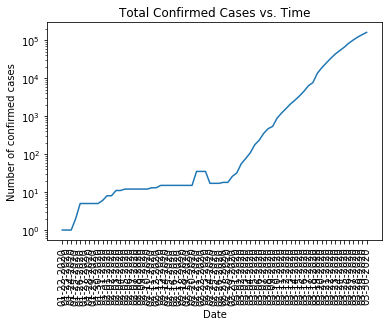

In [40]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

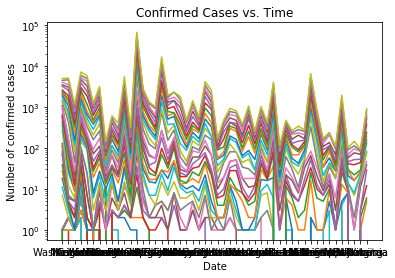

In [75]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':])

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

## Normalize each location’s time series to account for larger population centers

subtract mean from time series and set variance to one

In [134]:
idx = pd.IndexSlice

# confirmed cases normalized
data = stateData.loc[:,'01-22-2020':] # select all date ranges
scaledDataConfirmed = preprocessing.scale(data) # Scaled data has zero mean and unit variance

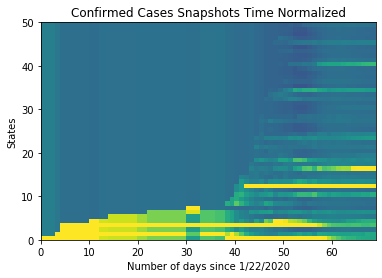

In [135]:
# plot normalized data snapshots
plt.title('Confirmed Cases Snapshots Time Normalized')
plt.pcolor(scaledDataConfirmed, vmin=-1, vmax=1)
plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('States')
plt.show()

## Take DMD

In [136]:
dmd = DMD()
dmd.fit(scaledDataConfirmed.T)


Eigenvalue (0.7169391340169058+0.20317636964334254j): distance from unit circle 0.4447176409336411
Eigenvalue (0.7169391340169058-0.20317636964334254j): distance from unit circle 0.4447176409336411
Eigenvalue (0.4483200313124133+0.4161189689956244j): distance from unit circle 0.6258541531660553
Eigenvalue (0.4483200313124133-0.4161189689956244j): distance from unit circle 0.6258541531660553
Eigenvalue (0.15102801480198608+0.5577079686299375j): distance from unit circle 0.6661523604716397
Eigenvalue (0.15102801480198608-0.5577079686299375j): distance from unit circle 0.6661523604716397
Eigenvalue (-0.12601875938982293+0.5792235453310587j): distance from unit circle 0.6486193568159689
Eigenvalue (-0.12601875938982293-0.5792235453310587j): distance from unit circle 0.6486193568159689
Eigenvalue (-0.3886010325243956+0.43006140674230153j): distance from unit circle 0.6640364239518063
Eigenvalue (-0.3886010325243956-0.43006140674230153j): distance from unit circle 0.6640364239518063
Eigenval

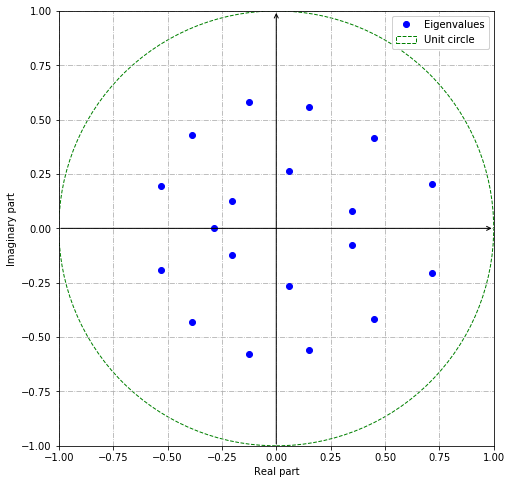

In [137]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

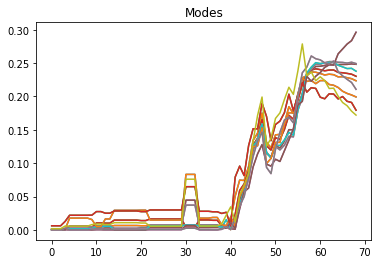

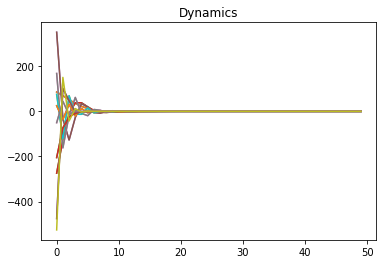

In [138]:
# modes for each date and country
for mode in dmd.modes.T:
    plt.plot(abs(mode.real))
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
plt.show()

In [139]:
mode.real

array([-0.00186018, -0.00186018, -0.00186018,  0.00582576,  0.00567504,
        0.00567504,  0.00567504,  0.00567504,  0.00567504,  0.00800393,
        0.00887198,  0.00887198,  0.00817568,  0.00817568,  0.01086177,
        0.01086177,  0.01086177,  0.01086177,  0.01086177,  0.01086177,
        0.01033313,  0.01033313,  0.0056569 ,  0.0056569 ,  0.0056569 ,
        0.0056569 ,  0.0056569 ,  0.0056569 ,  0.0056569 ,  0.0056569 ,
        0.07602465,  0.07602465,  0.07602465,  0.00579222,  0.00579222,
        0.00579222,  0.00583603,  0.00583603, -0.00915995,  0.02217191,
       -0.03459736, -0.01214979, -0.05229409, -0.06719881, -0.08400343,
       -0.1328459 , -0.17149444, -0.19919306, -0.12559701, -0.13706817,
       -0.16706851, -0.17539177, -0.19554026, -0.21382943, -0.20319767,
       -0.23799769, -0.27876037, -0.23117738, -0.23682591, -0.22351253,
       -0.22947804, -0.22388017, -0.2119457 , -0.21246739, -0.20046764,
       -0.19095802, -0.18618671, -0.17802482, -0.17208131])

In [140]:
# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)
freq

array([ 0.04395117, -0.04395117,  0.11907409, -0.11907409,  0.20791012,
       -0.20791012,  0.28409521, -0.28409521,  0.36694663, -0.36694663,
        0.44458046, -0.44458046,  0.03515486, -0.03515486,  0.21651919,
       -0.21651919,  0.41347366, -0.41347366,  0.5       ])

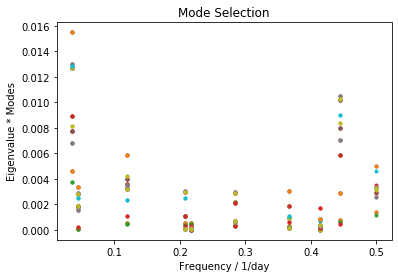

In [141]:
# modes for each date and country
i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


In [145]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = dynamic.real
fig = px.choropleth(df,    locations=statesA,  
                           locationmode="USA-states",
                           color=dynamic.real,
                           range_color=(0, 1),
                           scope="usa",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()